In [4]:
import pandas as pd

titanic = pd.read_csv('./titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


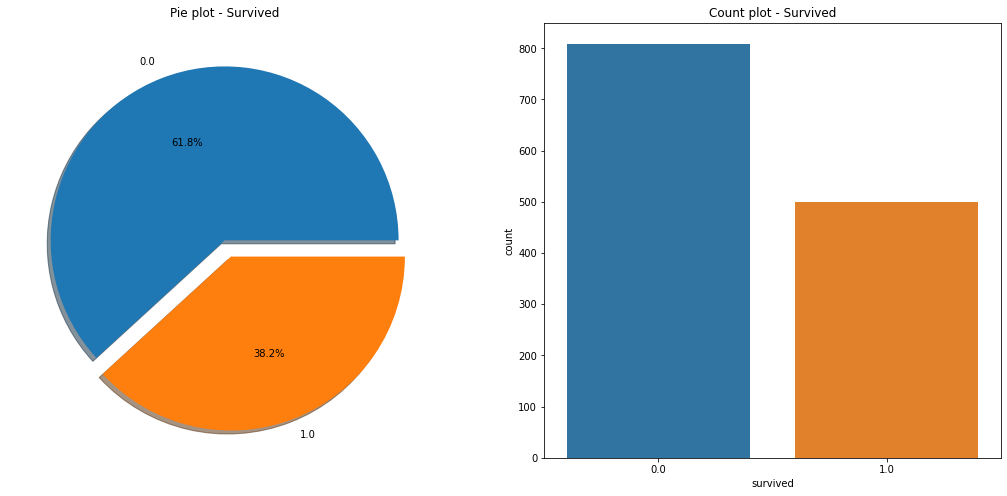

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['survived'].value_counts().plot.pie(explode=[0, 0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') #ylabel은 없애기
#막대 그래프
sns.countplot('survived', data = titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()


그래프 2개로 성별 column을 가지고 생존자 여부 표시

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


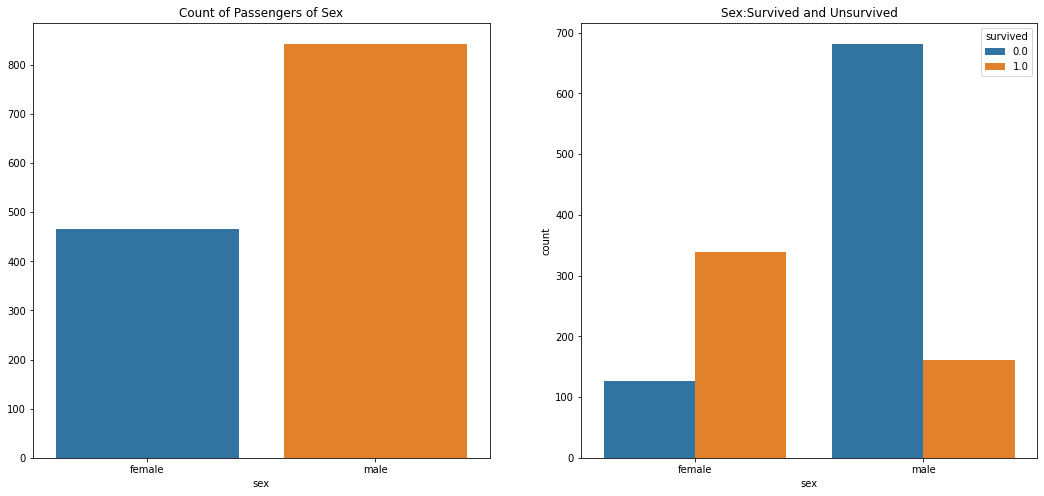

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
#남녀별로 타이타닉호에 탄 숫자
sns.countplot('sex', data = titanic, ax = ax[0])
ax[0].set_title('Count of Passengers of Sex')
ax[0].set_ylabel('') 
#hue: 색상으로 강조를 한다. 남녀 총 숫자 + 생존자 숫자
sns.countplot('sex', hue = 'survived', data = titanic, ax = ax[1]) #0이 사망. 1 이 생존
ax[1].set_title('Sex:Survived and Unsurvived')
plt.show()

경제력 대비 생존률 crosstab

In [8]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins = True) #가로, 세로, margin 합계


survived,0.0,1.0,All
pclass,,,
1.0,123,200,323
2.0,158,119,277
3.0,528,181,709
All,809,500,1309


선실 등급별 성별 현황 FacetGrid

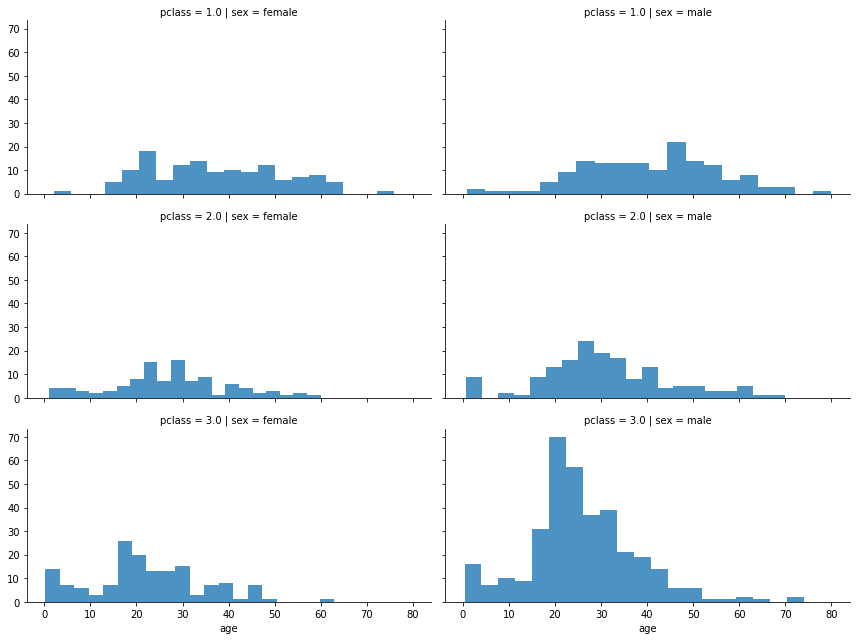

In [9]:
grid = sns.FacetGrid(titanic, row = 'pclass', col = 'sex', height = 3, aspect = 2)
grid.map(plt.hist, 'age', alpha = 0.8, bins = 20) #alpha = 투명도, bins = 몇 등분으로 나눌 것인가 


In [10]:
import plotly.express as px

fig = px.histogram(titanic, x = "age")
fig.show()

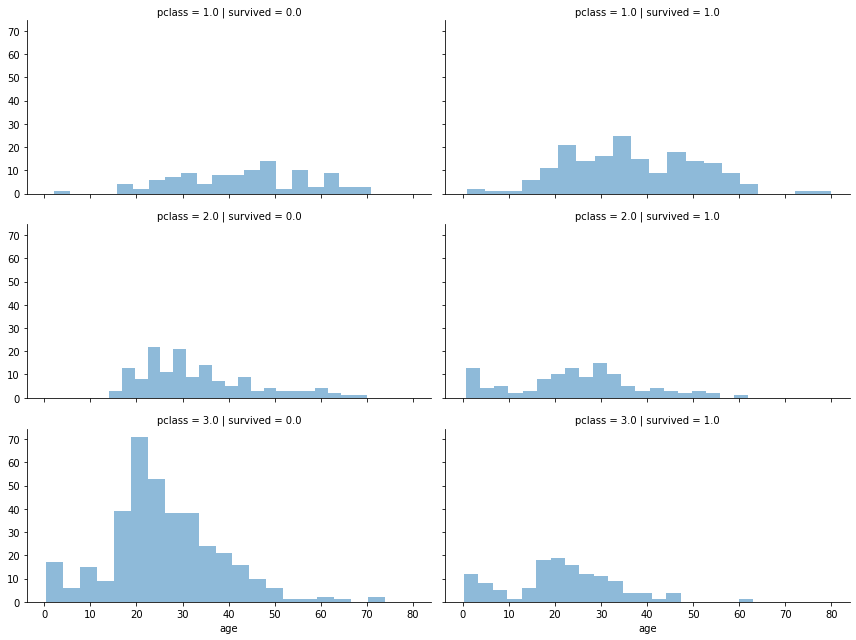

In [11]:
grid = sns.FacetGrid(titanic, col = 'survived', row = 'pclass', height = 3, aspect = 2)
grid.map(plt.hist, 'age', alpha = .5, bins = 20)

나이를 5단계로 정리하기

In [12]:
#age_cat column 새로 추가 cut 사용
#bins 구간, cut함수가 0을 포함 안시켜서 include_lowest
titanic['age_cat'] = pd.cut(titanic['age'], bins = [0, 7, 15, 30, 60, 100],
                            include_lowest = True,
                            labels = ['baby', 'teen', 'young', 'adult', 'old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


선실등급, 나이, 성별별 생존자 수를 한번에 파악하기 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



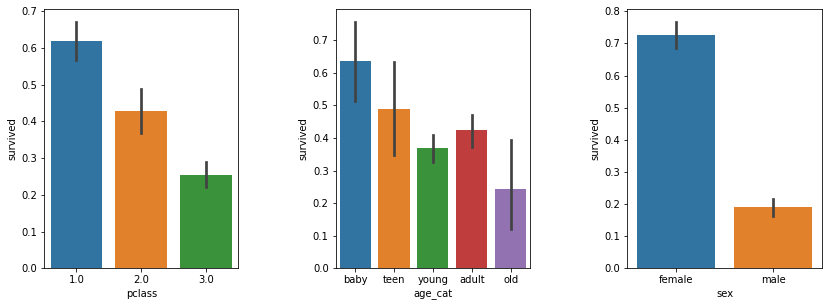

In [13]:
plt.figure(figsize = (12, 4))
plt.subplot(131)
sns.barplot('pclass', 'survived', data = titanic)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data = titanic)
plt.subplot(133)
sns.barplot('sex', 'survived', data = titanic)
plt.subplots_adjust(top =1, bottom = 0.1, left = 0.1, right = 1,
                    hspace = 0.5, wspace = 0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Male')

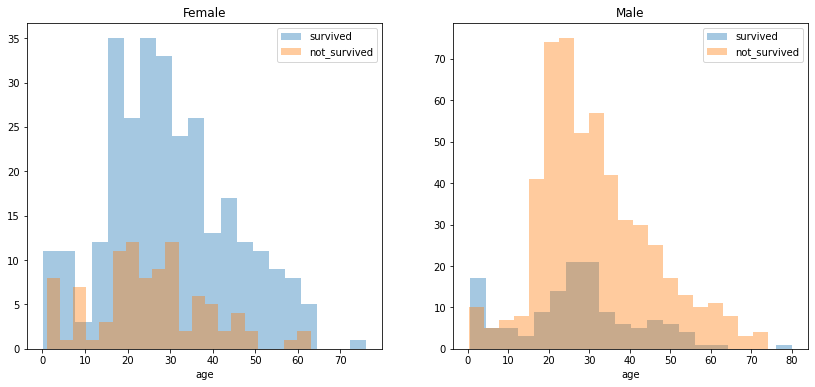

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))

women = titanic[titanic['sex'] =='female']
men = titanic[titanic['sex'] == 'male']

ax = sns.distplot(women[women['survived'] == 1]['age'], bins = 20,
                  label = 'survived', ax = axes[0], kde = False)
ax = sns.distplot(women[women['survived'] == 0]['age'], bins = 20,
                  label = 'not_survived', ax = axes[0], kde = False)
ax.legend(); ax.set_title('Female')

ax = sns.distplot(men[men['survived'] == 1]['age'], bins = 20,
                  label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived'] == 0]['age'], bins = 20,
                  label = 'not_survived', ax = axes[1], kde = False)
ax.legend(); ax.set_title('Male')

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   float64 
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
dtypes: category(1), float64(7), object(7)
memory usage: 144.9+ KB


In [16]:
titanic['sex'].unique()

array(['female', 'male', nan], dtype=object)

머신러닝을 위해 해당컬럼을 숫자로 변경 

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,gender
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,0


In [18]:
titanic.isnull().any() #결과가 없는 부분을 확인 

pclass        True
survived      True
name          True
sex           True
age           True
sibsp         True
parch         True
ticket        True
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
age_cat       True
gender       False
dtype: bool

In [19]:
#결과가 없는 부분은 제거 
titanic = titanic[titanic['pclass'].notnull()]
titanic = titanic[titanic['survived'].notnull()]
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  gender     1045 non-null   int64   
dtypes: category(1), float64(7), int64(1), object(7)
memory usage: 131.9+ KB


상관관계

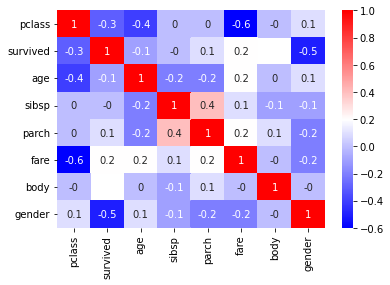

In [20]:
correlation_matrix = titanic.corr().round(1)
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'bwr')

특성을 선택하고 데이터를 나누자

In [21]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state = 13)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth = 2, random_state = 13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7559808612440191


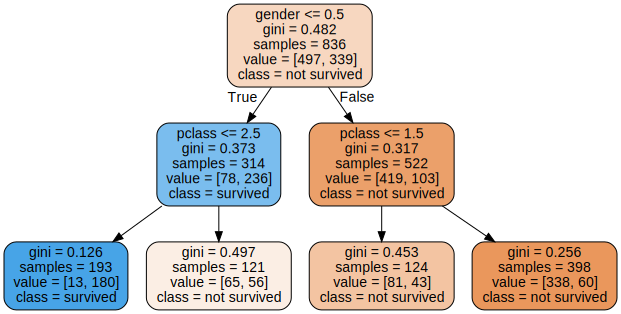

In [23]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(dt, feature_names=X.columns,
                       class_names=['not survived', 'survived'],
                       rounded=True, filled=True))


logistic regression 적용

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 13, solver = 'liblinear')
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))

0.7511961722488039


다시 데이터를 standaredscaler를 적용하고 다시 학습 

In [25]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS.fit(X)

X_ss = SS.transform(X)

X_train, X_test, y_train, y_test = \
train_test_split(X_ss, y, test_size = 0.2, random_state = 13)

lr.fit(X_train, y_train)

LogisticRegression(random_state=13, solver='liblinear')

In [27]:
#여전히 accuracy가 개선되지 않음 
pred = lr.predict(X_train)
print("Train Acc : ", accuracy_score(y_train, pred))

pred = lr.predict(X_test)
print("Train Acc : ", accuracy_score(y_test, pred))
#특성을 정규화했다고 항상 성과가 잘 나오는 것은 아님 

Train Acc :  0.7930622009569378
Train Acc :  0.7559808612440191


디카프리오와 윈슬릿의 생존율 

In [28]:
import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
dicaprio_ss = SS.transform(dicaprio)
print('Dicaprio : ', lr.predict_proba(dicaprio_ss))

Dicaprio :  [[0.8574148 0.1425852]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [29]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
winslet_ss = SS.transform(winslet)
print('Winslet : ', lr.predict_proba(winslet_ss)[0, 1])

Winslet :  0.9396528131031697


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [30]:
#10주차
#Logistic Regression 학습하기
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 13, solver = 'liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=13, solver='liblinear')

In [35]:
#Binarizer를 이용해서 Threshold값 변경 적용 0.5
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba = log_reg.predict_proba(X_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1) #행 단위에선 전체를, 열에선 사망확률 (0)이 아닌 생존 확률만 reshape를 이용해서 column형태로 

In [36]:
#Threshold = 0.5 예측
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1) #0.5를 기준으로 생존, 사망 값을 나눔
custom_predict[:5] #생존이다 사망이다 확률을 나타내주는 

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [40]:
#Precision, Recall 계산

from sklearn.metrics import accuracy_score, precision_score, recall_score

print ('Threshold : ', custom_threshold)
print ('Accuracy : ', accuracy_score(y_test, custom_predict)) #정답, 예측값
print ('Precision : ', precision_score(y_test, custom_predict))
print ('Recall : ', recall_score(y_test, custom_predict))

Threshold :  0.5
Accuracy :  0.7559808612440191
Precision :  0.7534246575342466
Recall :  0.625


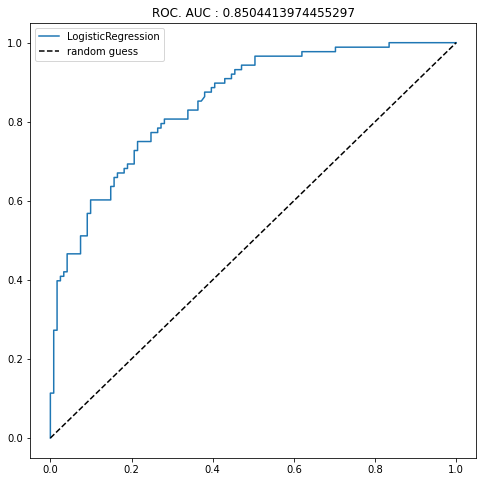

In [38]:
#ROC 커브 코드
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pred_proba_1 = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_1)
#fallout 가로 , recall 세로, threshold
#정답, 예측 확률 
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label = 'LogisticRegression')
plt.plot([0, 1], [0, 1], 'k--', label = 'random guess')
#기준선 k: 검은색 실선 
plt.title("ROC. AUC : " + str(roc_auc_score(y_test, pred_proba_1)))
plt.legend()
plt.show()

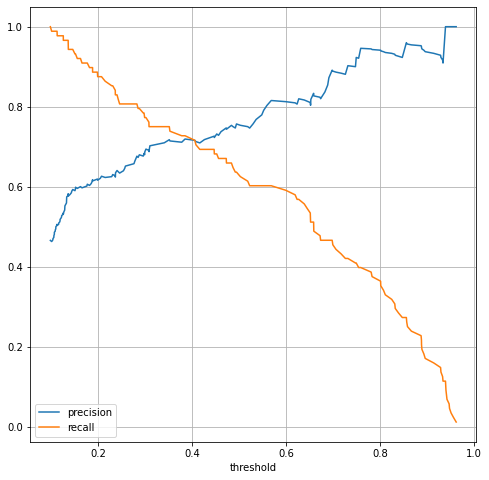

In [ ]:
#Precision Recall 커브 곡선
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_1)

plt.figure(figsize=(8, 8))
plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.legend()
plt.grid()
plt.xlabel('threshold')
plt.show()